In [1]:
from __future__ import annotations
import torch
from time import sleep
import matplotlib.pyplot as plt
from pyprofile import Profile, profile

In [2]:
def f(b: int, n: int) -> torch.Tensor:
    X, Y = torch.randn(2, b, n, n, device='cuda')
    return X.bmm(Y)

In [3]:
@profile(verbose=True)
def run():
    for _ in range(10):
        f(512, 1000)

In [4]:
with Profile('dev') as dev:
    for _ in range(10):
        sleep(1)
        f(512, 1000)

In [5]:
run()

In [6]:
import json

In [7]:
with open('.profile/memory_profile__final_inference_v2::run.json', 'r') as openfile:
    data = json.load(openfile)

In [10]:
data['timedelta'] = 0.2
dev.data = data

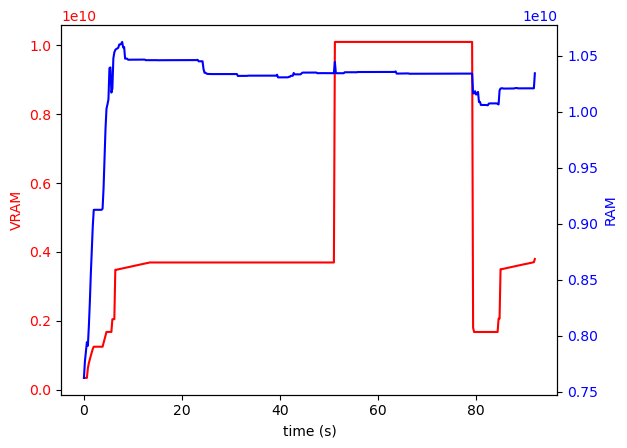

In [11]:
dev.plot()

In [26]:
timedelta = 0.2

In [31]:
T = len(data['ram']) * timedelta

In [41]:
import numpy as np
from typing import Union

In [ ]:
def plot(data: dict[str, int | list[float]], percent: bool = False):
    t = len(data['ram']) * timedelta
    x = np.arange(0, t, data['timedelta'])
    ram, vram = np.array(data['ram']), np.array(data['vram'])
    if percent:
        ram /= data['total_ram']
        vram /= data['total_vram']
    fig, ax1 = plt.subplots()
    ax1.plot(x, vram, c='red')
    ax1.set_ylabel('VRAM', color='red')
    ax1.tick_params(axis='y', labelcolor='red')
    ax2 = ax1.twinx()
    ax2.plot(x, ram, c='blue')
    ax2.set_ylabel('RAM', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    ax1.set_xlabel('time (s)')
    plt.show()

In [35]:
X = np.arange(0, T, timedelta)

In [39]:
for k, v in data.items():
    print(k, type(v))

ram <class 'list'>
ram_pid <class 'list'>
vram <class 'list'>
total_ram <class 'int'>
total_vram <class 'int'>


In [25]:
data.keys()

dict_keys(['ram', 'ram_pid', 'vram', 'total_ram', 'total_vram'])

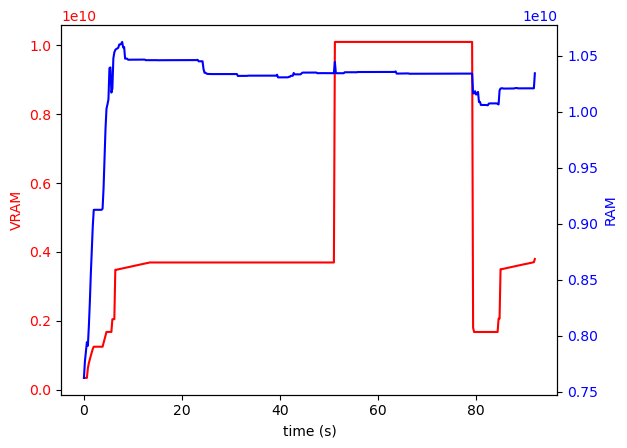

In [38]:
fig, ax1 = plt.subplots()
ax1.plot(X, data['vram'], c='red')
ax1.set_ylabel('VRAM', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax2 = ax1.twinx()
ax2.plot(X, data['ram'], c='blue')
ax2.set_ylabel('RAM', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('time (s)')
plt.show()